```
ID: 0710018
Name: 張宸愷
```

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

seeds = pd.read_table("data/seeds_dataset.txt",
                      header=None, sep='\t+', engine='python')  # read wheat seeds dataset
# read ionosphere dataset
ionosphere = pd.read_csv("data/ionosphere.data", header=None, sep=',')

# print(seeds.head(20))

# print(ionosphere.head(20))

seeds_orig = seeds.to_numpy()
ionosphere_orig = ionosphere.to_numpy()

np.random.shuffle(seeds_orig)
np.random.shuffle(ionosphere_orig)

X_seeds = scale(seeds_orig[:, 0:-1], axis=0)
X_iono = scale(ionosphere_orig[:, 0:-1], axis=0)



In [31]:
from sklearn.model_selection import train_test_split


class Kmeans:

    centers = None

    def __init__(self, K) -> None:
        self.K = K

    def predict(self, X: np.ndarray):
        feature_num = X.shape[1]
        low = [X[:, i].min() for i in range(feature_num)]
        high = [X[:, i].max() for i in range(feature_num)]
        self.centers = np.zeros((self.K, feature_num), dtype=np.float64)
        for a in range(self.K):
            self.centers[a] = [np.random.uniform(
                low=low[i], high=high[i]) for i in range(feature_num)]
        dis = np.ones((self.K, feature_num), dtype=np.float64)
        while np.sum(dis) > 0.5:

            assign = self.__assign(X)
            new_c = self.__update(X, assign)
            dis = np.sum(np.abs(new_c - self.centers))
            self.centers = new_c

        return assign

    def __update(self, X, assign):
        new_cen = np.zeros((self.K, X.shape[1]))
        for i in range(self.K):
            mask :np.ndarray= np.where(assign == i, 1, 0)
            ss = np.moveaxis(X, 0, -1) * mask
            ss = np.moveaxis(ss, 0, -1)
            div = np.sum(mask)
            new_cen[i] = (np.sum(ss, axis=0) / div)
        return new_cen

    def __assign(self, X) -> np.ndarray:
        dis = np.zeros((X.shape[0], self.K), dtype=np.float64)
        for i in range(self.K):
            dis[:, i] = np.sqrt(np.sum((X - self.centers[i])**2, axis=1))
        return dis.argmin(axis=1)


km = Kmeans(3)
km.predict(X_iono)


array([2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2,
       0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1,
       1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1,

# Questions
## K-means clustering
> Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance. - 10%



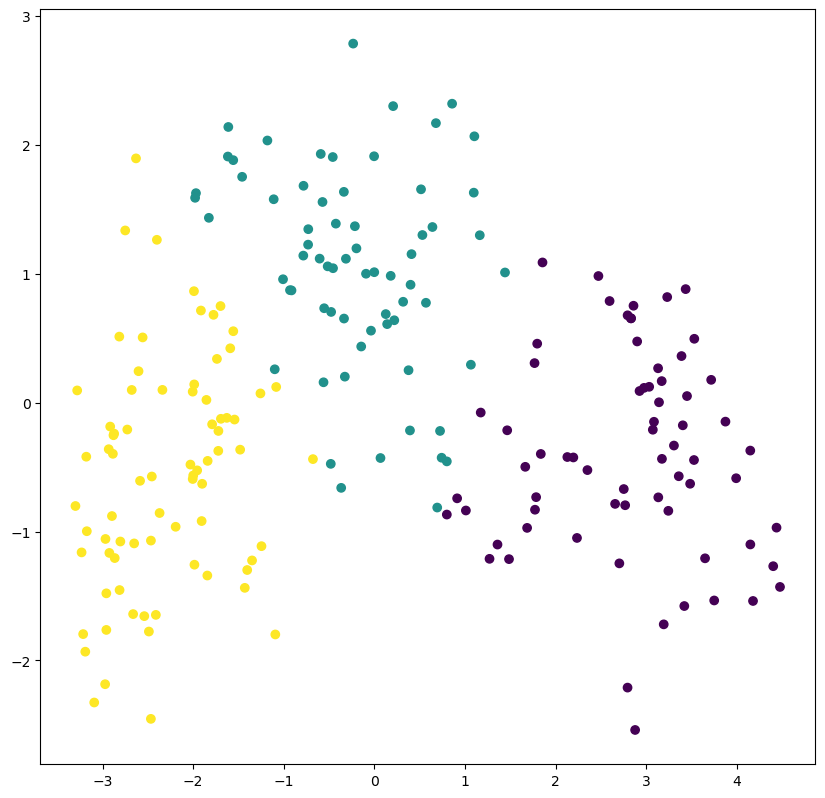

In [32]:
from sklearn.decomposition import PCA


pc = PCA(n_components=2)
X = pc.fit_transform(X_seeds)

km = Kmeans(K=3)
pred = km.predict(X)

fig = plt.figure(figsize=(10,10), dpi=100)

plt.scatter(X[:,0], X[:,1], c=pred)
